In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import The Necessary Library
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#Load The Dataset That is on .excel FIle 
data=pd.read_csv('/content/drive/My Drive/project/Dataset/housing.csv')

In [4]:
#Head() Is Used the Show the first 5 Rows Of the Dataset 
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#Tail() Is Used the Show the first 5 Rows Of the Dataset 
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
#Check The Shape Of The Dataset 
data.shape

(20640, 10)

In [7]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

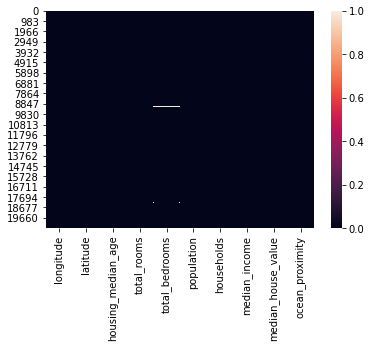

In [10]:
sns.heatmap(data.isnull())

In [11]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace = True)

In [12]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

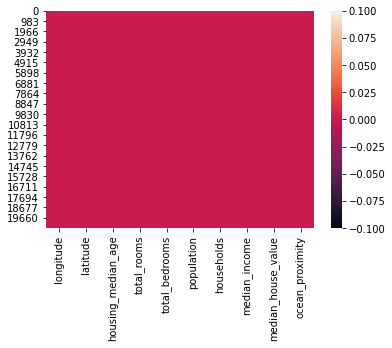

In [13]:
sns.heatmap(data.isnull())

In [14]:
categorical = data.select_dtypes(include = ["object"]).keys()
categorical

Index(['ocean_proximity'], dtype='object')

In [15]:
Numerical = data.select_dtypes(include = ["int32"]).keys()
Numerical

Index([], dtype='object')

In [16]:
Float = data.select_dtypes(include = ["float64"]).keys()
Float

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [17]:
data[Float].describe()#Describe the dataset Column Value 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


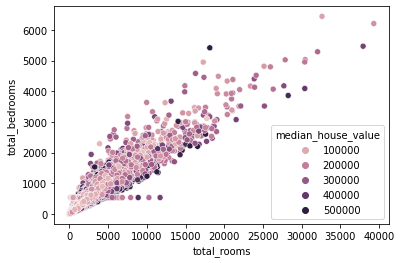

In [18]:
sns.scatterplot(x='total_rooms',y='total_bedrooms',hue='median_house_value',data=data)

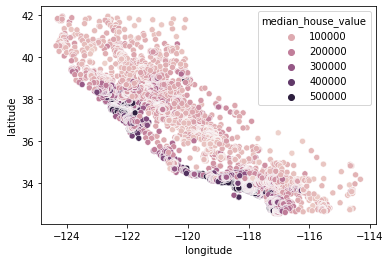

In [19]:
sns.scatterplot(x='longitude',y='latitude',hue='median_house_value',data=data)

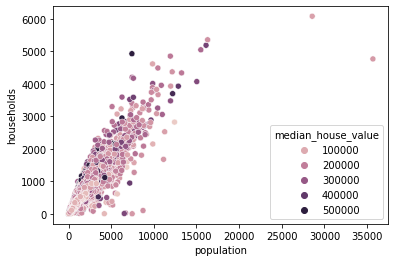

In [20]:
sns.scatterplot(x='population',y='households',hue='median_house_value',data=data)

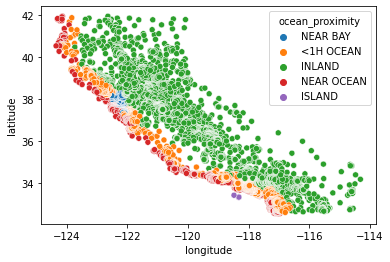

In [21]:
sns.scatterplot(x='longitude',y='latitude',hue='ocean_proximity',data=data)

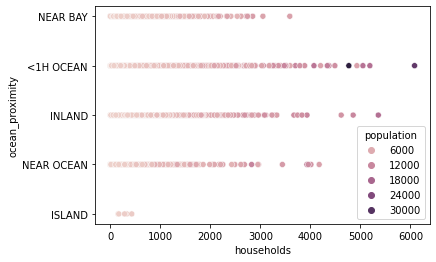

In [22]:
sns.scatterplot(x='households',y='ocean_proximity',hue='population',data=data)

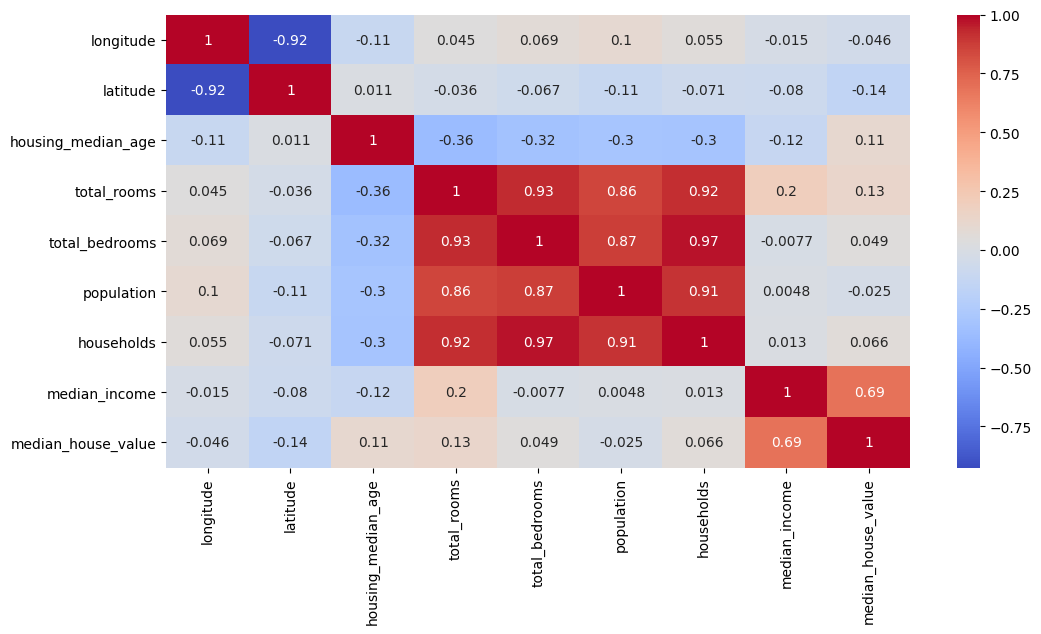

In [23]:
#Check the Correlation between columns 
corr_df = data.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

In [24]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Outliars Detection 

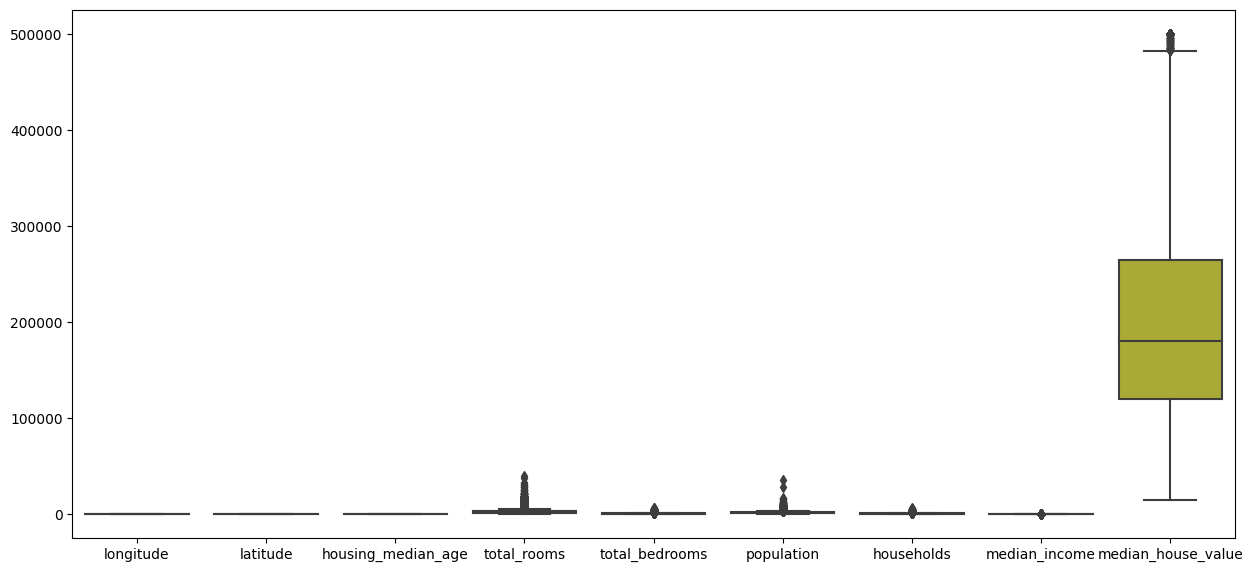

In [25]:
#Usnig the Box plot 
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']])

In [26]:
#Removing the Outliars With the Help of Quartiles Technique
from numpy import percentile
columns = data.columns
for j in columns:
    if isinstance(data[j][0], str) :
        continue
    else:
        for i in range(len(data)):
            #defining quartiles
            quartiles = percentile(data[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if data[j][i] > upper_fence:
                data[j][i] = upper_fence
            elif data[j][i] < lower_fence:
                data[j][i] = lower_fence

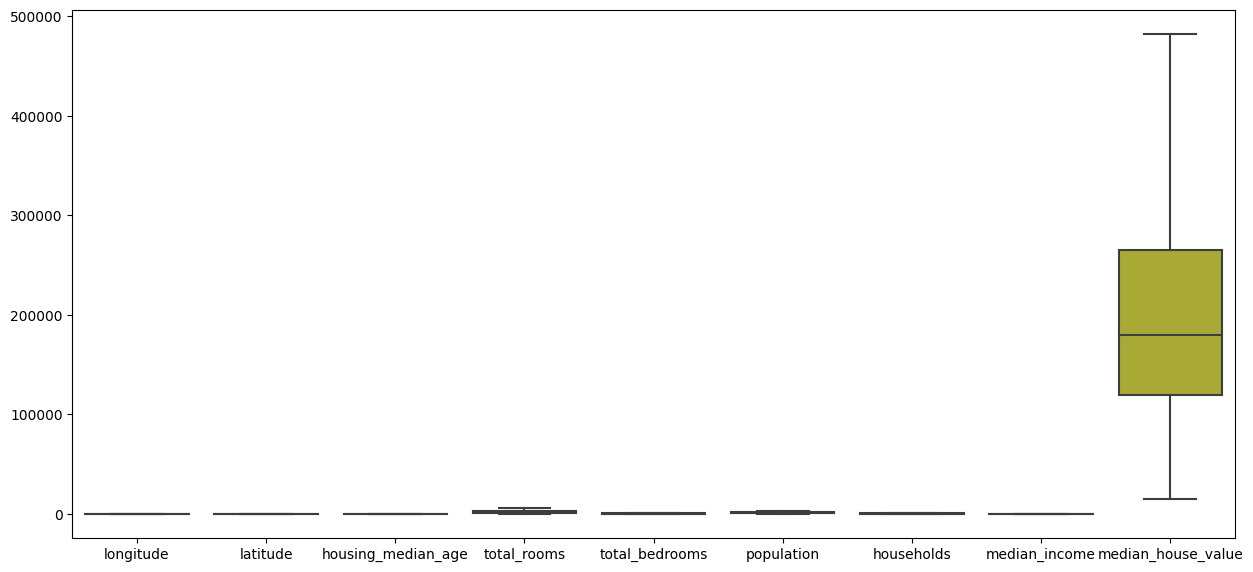

In [27]:
#Usnig the Box plot 
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']])

In [28]:
#Convert the column with help of pandas getdummies method 
data['ocean_proximity'] = pd.Categorical(data['ocean_proximity'])
dfDummies_region = pd.get_dummies(data['ocean_proximity'], prefix = 'ocean_proximity',drop_first = False)
dfDummies_region

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [29]:
#Concat it with the dataset 
data = pd.concat([data, dfDummies_region], axis=1)
data=data.drop('ocean_proximity',axis=1)
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,0,0,0,1,0


In [30]:
data.shape

(20640, 14)

In [31]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [32]:
x=data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']].copy()

In [33]:
x.shape

(20640, 13)

In [34]:
y=data['median_house_value']

In [35]:
y.shape

(20640,)

In [36]:
y=y.values.reshape(-1,1)

In [37]:
y.shape

(20640, 1)

In [38]:
x.shape

(20640, 13)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=42)

In [40]:
x_train.shape

(14447, 13)

In [41]:
x_test.shape

(6192, 13)

In [42]:
y_train.shape

(14447, 1)

In [43]:
y_test.shape

(6192, 1)

In [44]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lm.coef_

array([[-2.55853652e+04, -2.42252419e+04,  1.25367337e+03,
        -1.98523821e+01,  2.25458316e+02, -6.45982031e+01,
         6.59301991e+01,  4.76144949e+04, -1.59657852e+04,
        -5.17244232e+04,  1.08894004e+05, -2.62360627e+04,
        -1.49677326e+04]])

In [46]:
lm.intercept_

array([-2188089.84850118])

In [47]:
lm.score(x_train,y_train)

0.6711053477276705

In [48]:
pred=lm.predict(x_test)
print('predicate result:',pred)
print('actual price',y_test)

predicate result: [[ 68066.93786943]
 [123724.10384785]
 [257626.18034294]
 ...
 [203036.08926095]
 [152014.13820419]
 [187468.18498484]]
actual price [[ 47700. ]
 [ 45800. ]
 [482412.5]
 ...
 [218400. ]
 [119400. ]
 [209800. ]]


In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [50]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 49493.71531380236
mean square error 4437469343.350038
rooot mean square error 66614.3328672594


In [51]:
from sklearn.metrics import r2_score
print('R2 score ',r2_score(y_test,pred))

R2 score  0.6494346120277681


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [53]:
score=cross_val_score(lm,x,y,cv=10,scoring='neg_mean_squared_error')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(lm,x,y,cv=5)
print('prediction \n',y_pred)

score of mean 
 -4896005813.267534
score of standard devition 
 1493434680.7461476
prediction 
 [[465305.44717267]
 [495819.30641683]
 [440853.44057141]
 ...
 [ 36289.12442704]
 [ 49390.86200154]
 [ 68549.20714514]]


In [54]:
import numpy as np
from numpy import *

In [55]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [56]:
pred=knn.predict(x_test)#Pred
print(' prediction \n',pred[1:5])#print the predicted Value 

 prediction 
 [[196360.]
 [367345.]
 [202110.]
 [144150.]]


In [57]:
knn.score(x_train,y_train)

0.43160927076615047

In [58]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 74764.44026970284
mean square error 9150385271.841452
rooot mean square error 95657.64617552249


In [59]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.2771086142317364


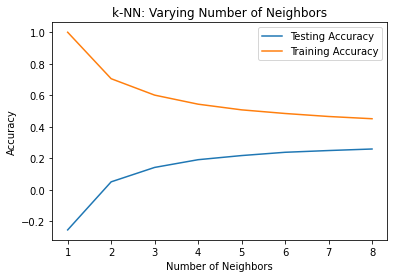

In [60]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsRegressor(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [61]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor() #max_leaf_nodes=12 #random_state=1
tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [62]:
tree.score(x_train,y_train)

1.0

In [63]:
pred=tree.predict(x_test)#Pred
print(' prediction \n',pred[1:5])#print the predicted Value a

 prediction 
 [ 26600. 400000. 302700. 276000.]


In [64]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 43168.90358527132
mean square error 4524539752.031008
rooot mean square error 67264.69915216307


In [65]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.6425559455540744


In [66]:
from sklearn.ensemble import RandomForestRegressor
RR= RandomForestRegressor() #max_leaf_nodes=12 #random_state=1
RR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
RR.score(x_train,y_train)

0.9742994022272303

In [68]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 43168.90358527132
mean square error 4524539752.031008
rooot mean square error 67264.69915216307


In [69]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.6425559455540744


In [70]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 30, 40, 50, 60])
ridge.fit(x_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 1.0


In [71]:
ridge.fit(x_train, y_train)

RidgeCV(alphas=array([1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00,
       1.e+01, 2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [72]:
y_train_ridge_pred = ridge.predict(x_train)
y_test_ridge_pred = ridge.predict(x_test)

In [73]:
mse_train = np.mean((y_train_ridge_pred - y_train)**2)
print("MSE on Training set : ", mse_train )


mse_test = np.mean((y_test_ridge_pred - y_test)**2)

print("MSE on Test set : ", mse_test )

print(ridge.score(x_test,y_test))



MSE on Training set :  4238218381.8443713
MSE on Test set :  4438535528.210726
0.6493503821479836


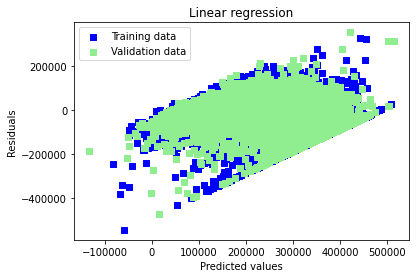

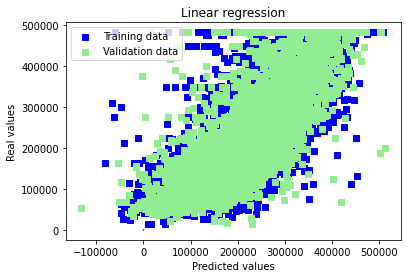

In [74]:
plt.scatter(y_train_ridge_pred, y_train_ridge_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ridge_pred, y_test_ridge_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_ridge_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ridge_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [75]:
from sklearn.externals import joblib
joblib.dump(data,'housing.pkl')

['housing.pkl']